#**Computer Vision**

##**Practical Tasks**










##Step1: Load the Dependencies

> This section should load some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

*Useful intro about [OpenCV](https://opencv.org/)*









In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

##Step2: Read Image from Urls

> In this step you will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.


In [ ]:
# Create a list to store the urls of the images
urls = [
    "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571",
        # "https://kartinki.pics/pics/uploads/posts/2022-06/1656575091_1-kartinkin-net-p-strit-art-koti-krasivo-1.jpg",
    # "https://kartinki.pics/pics/uploads/posts/2022-06/1656575050_6-kartinkin-net-p-strit-art-koti-krasivo-6.jpg"
    ]
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url)
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

#### TODO #1: Read an image from a URL and display it

Image source examples:

[Place Kitten](https://placekitten.com/) - use the base Place Kitten URL followed by a width and height separated by backslashes ''/''. For example, use the URL `https://placekitten.com/500/300` to fetch a cat image with a width of 500px and height of 300px.

[Google Image search](https://www.google.com/imghp?hl=en) - search for an image. Left-click one of the returned images, then right-click on the full image, and then select "Copy Image Address".

In [ ]:
import requests
from io import BytesIO
from PIL import Image
import cv2

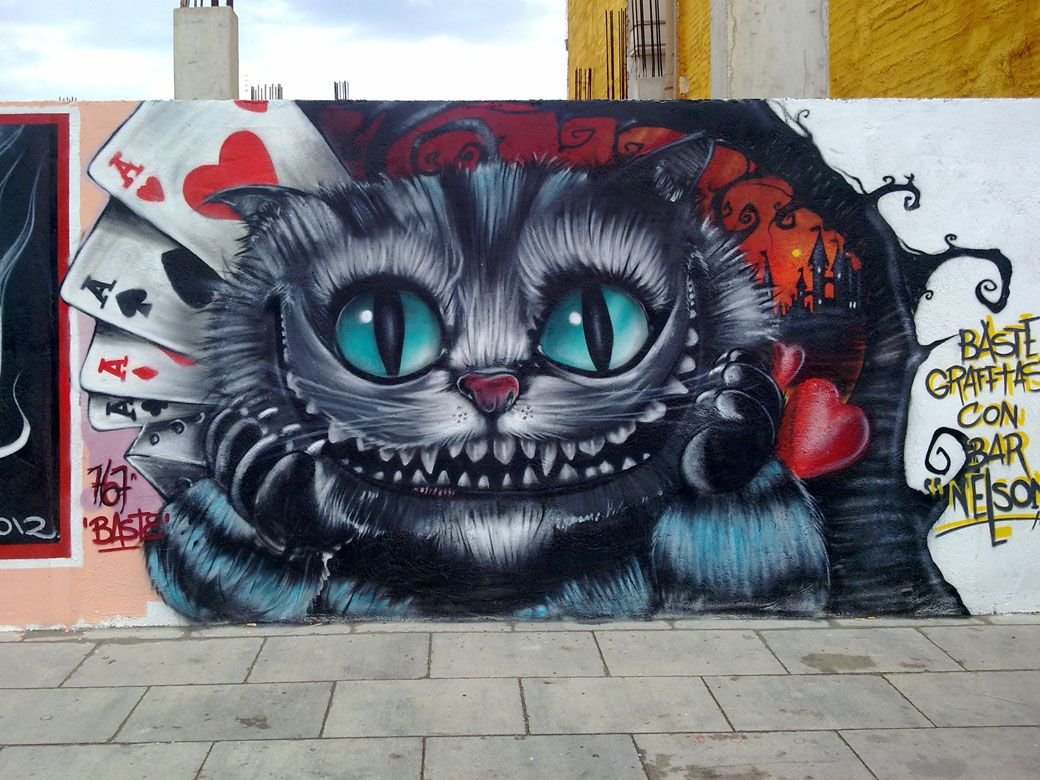

In [ ]:
## TODO: LOAD IMAGE
url = "https://kartinki.pics/pics/uploads/posts/2022-06/1656575050_6-kartinkin-net-p-strit-art-koti-krasivo-6.jpg"
myImg = io.imread(url)
cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))


##Step3: Image Contours and Histograms

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image
print(image.shape[0])
# Check the width of image
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
571
800
3


### Generate Histogram of color image and grayscale image

More info: [Histogram](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)

In [ ]:
plt.hist(image.ravel(),bins = 256, range = [0,256])
plt.show()

Display the histogram of R, G, B channel
We could observe that the green channel has many pixels in 255, which represents the white patch in the image

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

 #### TODO # 2: DISPLAY THE GRAYSCALE OF YOUR COLOR IMAGE AND GENERATE HISTOGRAM


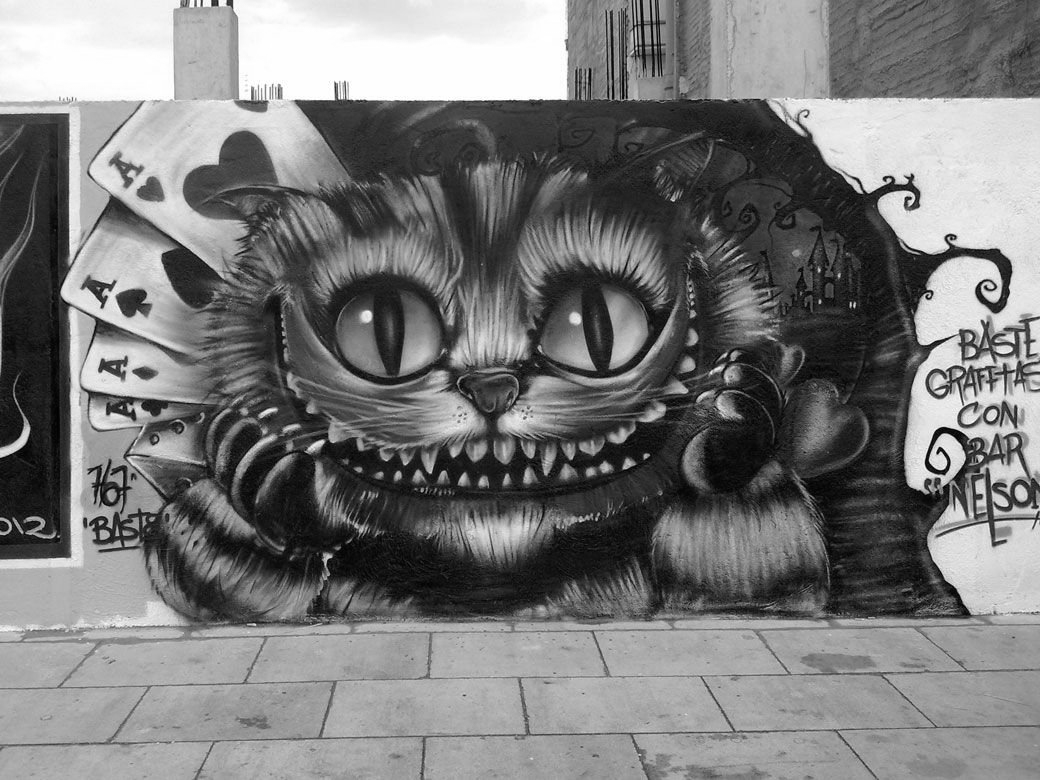

In [ ]:
myGrayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
cv2_imshow(myGrayImg)

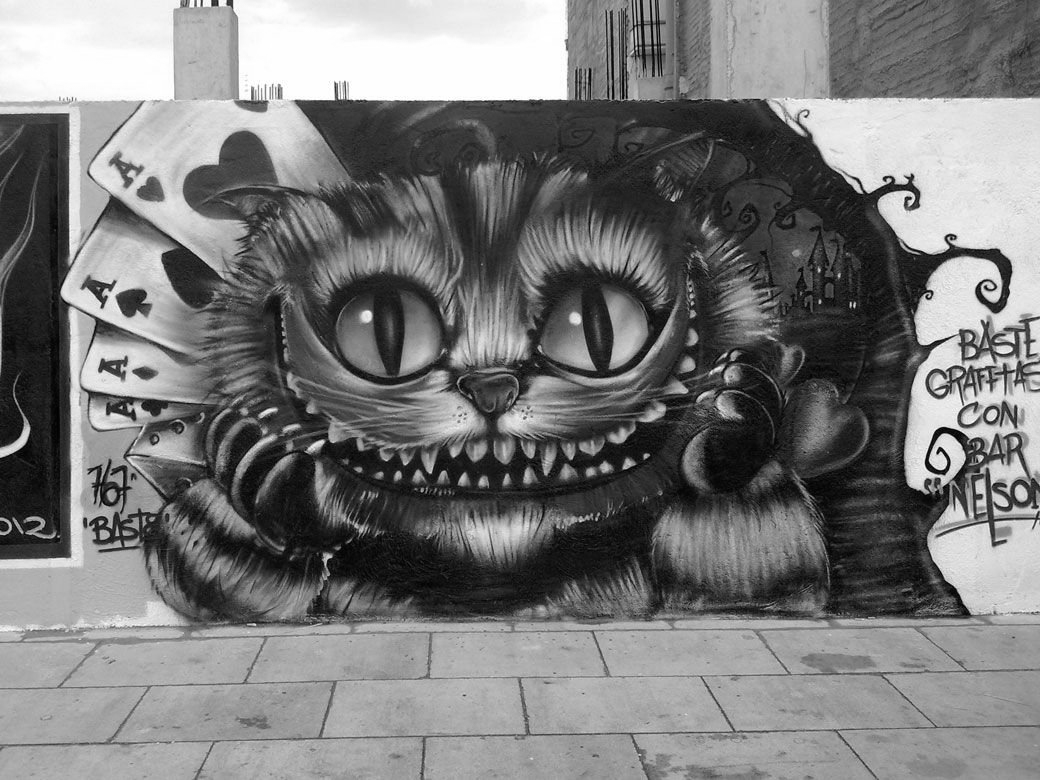

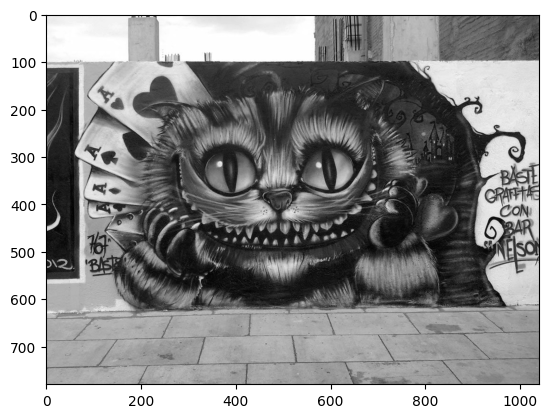

In [ ]:
plt.imshow(myGrayImg,cmap='gray')
cv2_imshow(myGrayImg )


### Find image contour of the grayscale image

Method 1: Use the matplotlib. contour

More Info: [matplotlib contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html)

In [ ]:
plt.contour(gray_image, origin = "image")

Method 2: Use the openCV lib

More info: [Contour](https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html)

In [ ]:
# Set threshold for the countour detection
ret, thresh = cv.threshold(gray_image,150,255,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)

#### TODO # 3: Find the contour of your own image

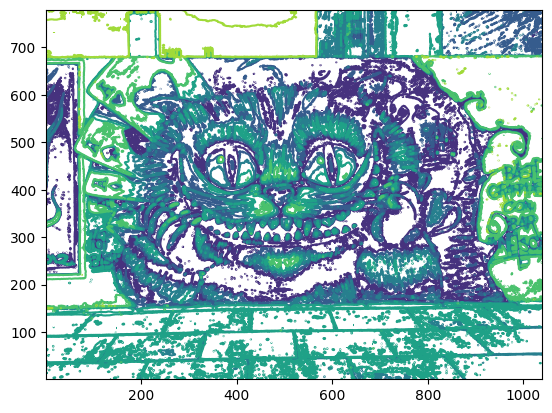

In [ ]:
# Your code
plt.contour(myGrayImg,origin = "image" )

##Step4: Grayscale Transform and Histogram Equalization


In [ ]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)

In [ ]:
# Another transform of the image, after adding a constant,
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

In [ ]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

#### TODO #4:  Try some mathematical operations on your image


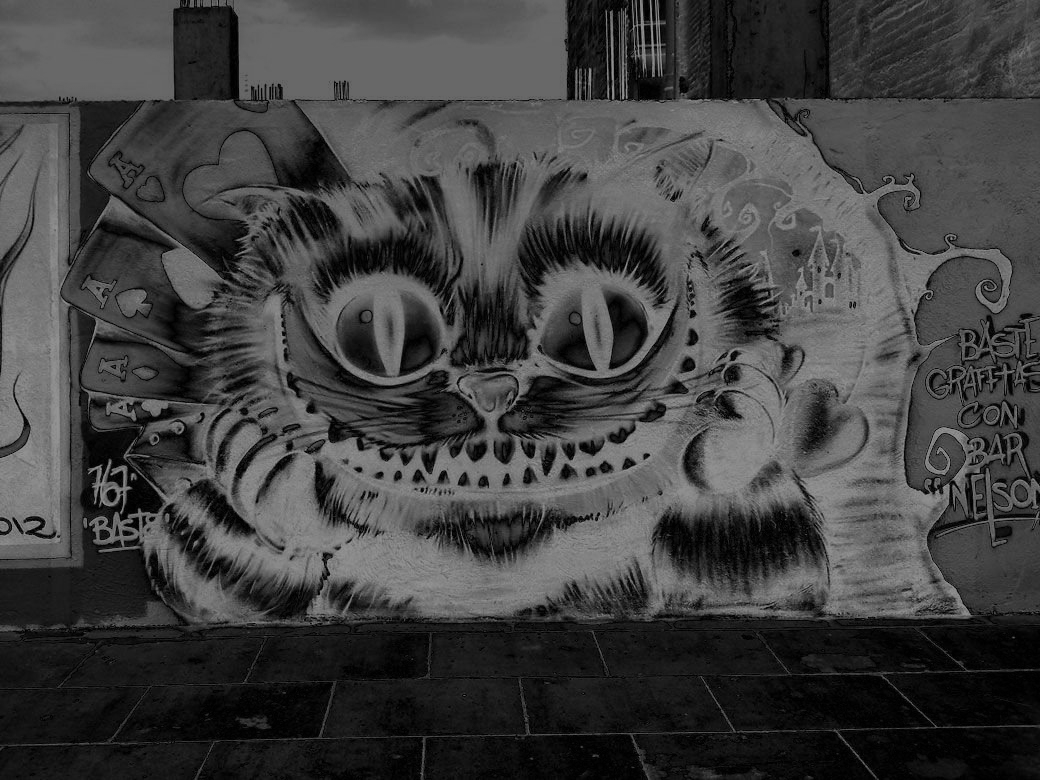

In [ ]:
## Implement your code here
## myGrayImgTrans = myGrayImg...
## cv2_imshow(myGrayImgTrans)
myGrayImgTrans = cv2.convertScaleAbs(myGrayImg, alpha=-1, beta=150)
cv2_imshow(myGrayImgTrans)


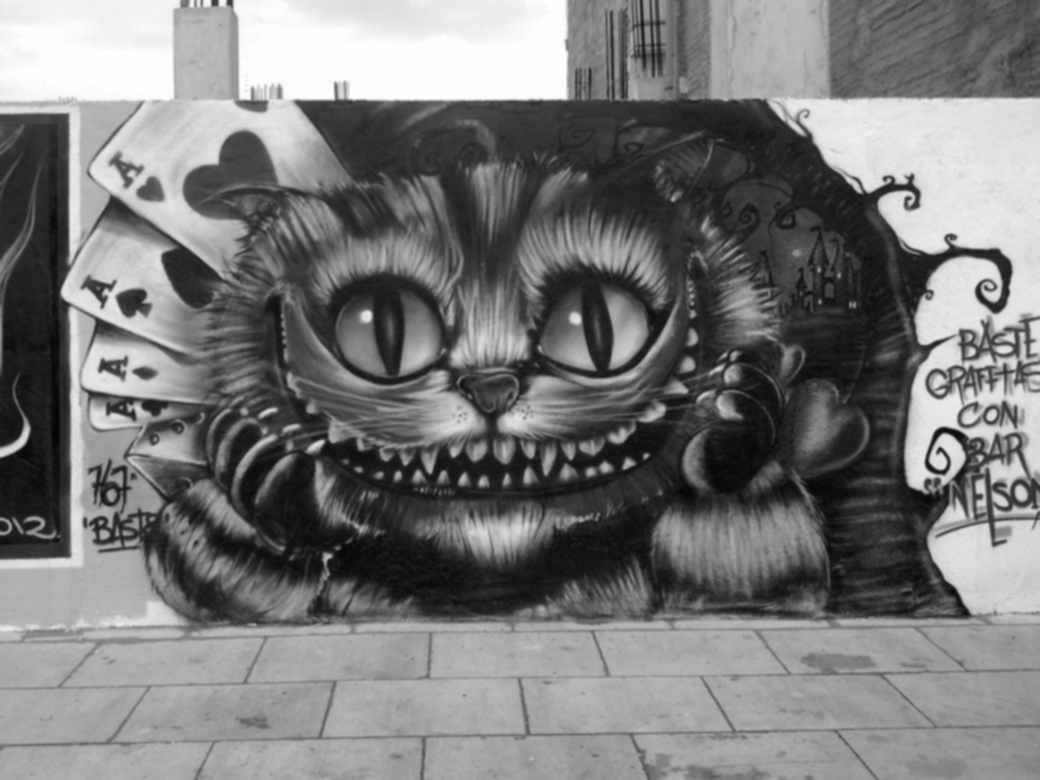

In [ ]:
kernel_size = (5, 5)  # Розмиття по Гауссу
myGrayImgTrans = cv2.GaussianBlur(myGrayImg, kernel_size, 0)
cv2_imshow(myGrayImgTrans)


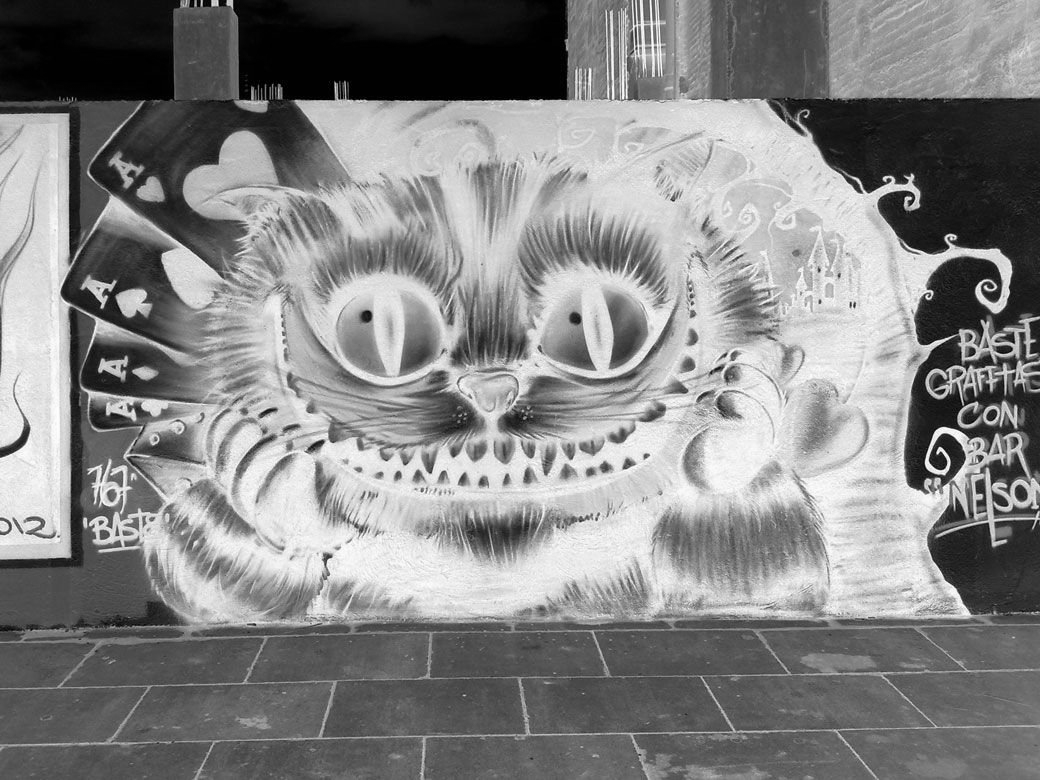

In [ ]:
myGrayImgTrans = 255 - myGrayImg #інверсія кольору
cv2_imshow(myGrayImgTrans)


### Histogram Equalization
In this section you will demonstrate histogram equalization on a dark image.

In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

In [ ]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

In [ ]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

#### TODO # 5: Do a histogram equalization on your grayscale image



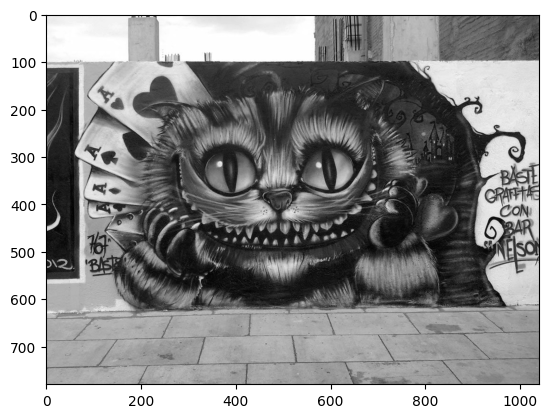

In [ ]:
## TODO: IMPLEMENT YOUR CODE HERE
## CODE INSTRUCTION
##plt.imshow()

# Виконуємо вирівнювання гістограми
myGrayImgEqualized = cv2.equalizeHist(myGrayImg)


plt.imshow(myGrayImgEqualized, cmap='gray')

plt.imshow(myGrayImg, cmap="gray")

##Step5: Fourier Transform of Gray Images
[FFT](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)
> A fourier transform is used to find the frequency domian of an image. You can consider an image as a signal which is sampled in two directions. So taking a fourier transform in both X and Y directions gives you the frequency representation of image. For the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. Edges and noises are high frequency contents in an image because they change drastically in images.

In [ ]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### TODO # 6: Generate a fourier transform of your grayscale image

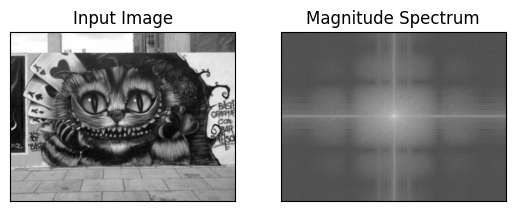

In [ ]:
# todo: Implement your code here
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(myGrayImg,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


## Step6: Finding Edges by Highpass Filtering in FFT

In this section you will use a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges

In [ ]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

### TODO # 7: Use High Pass Filtering

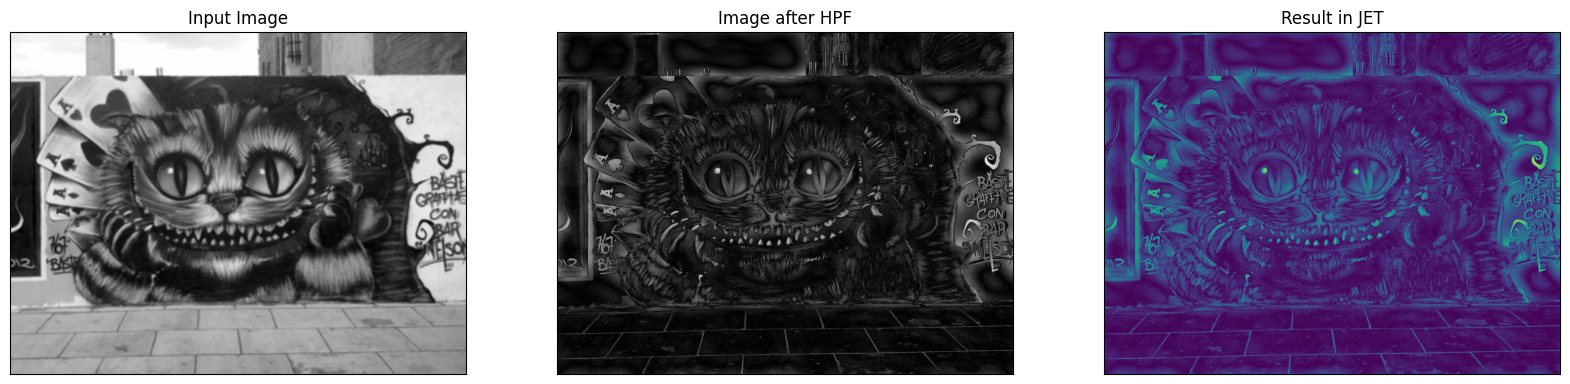

In [ ]:
# todo: Implement your code here
# Apply FFT to the image
f = np.fft.fft2(myGrayImg)
fshift = np.fft.fftshift(f)

rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
!pip install git+https://github.com/mehalyna/cooltest.git

  Cloning https://github.com/mehalyna/cooltest.git to /tmp/pip-req-build-bb6ii7an
  Running command git clone --filter=blob:none --quiet https://github.com/mehalyna/cooltest.git /tmp/pip-req-build-bb6ii7an
  Resolved https://github.com/mehalyna/cooltest.git to commit f4c950440e06f6870bf813c9e2f1b253f1f497ba
  Preparing metadata (setup.py) ... done
  Created wheel for cooltest: filename=cooltest-26.18-py3-none-any.whl size=5420 sha256=6908afc0807a47d14ecd14275769ab4fb486f768409f6f32063cfaa1d6e798b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ftpfv10m/wheels/5f/d0/08/46fba8323b078d91da2d05922a680d9728e94d53b453a8dd79
Successfully built cooltest


In [ ]:
from cooltest.test_cool_5 import *

Pass


## Practical Task #1. Image Color Detection

**Description:** Write a Python program that takes an image as input and detects the dominant color in the image. You can use a library like OpenCV to read the image and perform color analysis. Your program should display the detected color along with the percentage of its presence in the image.

**Steps:**
1. Import the necessary libraries (OpenCV, numpy).
2. Read the input image using OpenCV.
3. Convert the image from BGR to HSV color space (for better color analysis).
4. Apply a clustering algorithm (such as K-Means) to identify the dominant color.
5. Calculate the percentage of the dominant color's presence in the image.
6. Display the detected color and its percentage.



In [ ]:
from google.colab import drive
# drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/SoftServe AI/

Cluster 1 color: (227, 184, 8)    Percentage: 32.75%
Cluster 2 color: (43, 60, 7)    Percentage: 58.42%
Cluster 3 color: (186, 207, 249)    Percentage: 8.83%


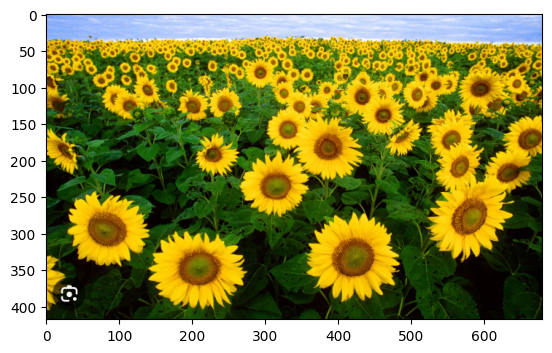

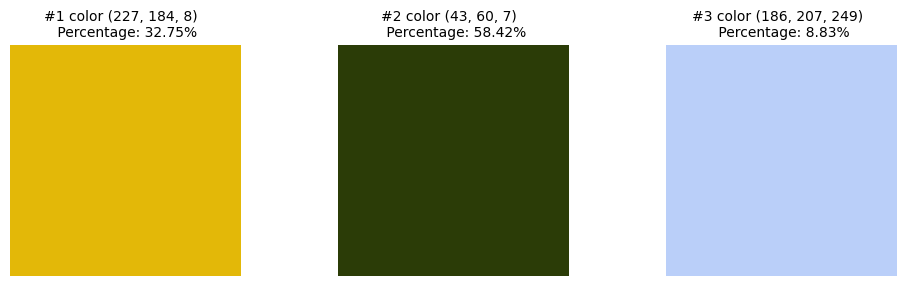

Dominant Color: (43, 60, 7)
Percentage: 58.42%


In [4]:
import cv2
from skimage import io
from google.colab.patches import cv2_imshow # for image display
import numpy as np
from sklearn.cluster import KMeans
from urllib.request import urlopen
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt


def detect_dominant_color(image_path):
    # # Read the image
    # response = urlopen(image_path)
    # image_data = BytesIO(response.read())
    # img = Image.open(image_data)
    img = io.imread(image_path)
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    # # show the image
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    # cv2_imshow(img)
    # cv2_imshow(img2)

    # Flatten the image
    pixels = img.reshape((-1, 3))

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=SIZE, random_state=0, n_init=10,) # max_iter=100
    kmeans.fit(pixels)

    dominant_color = ()
    dominant_percentage = 0
    # Visualize dominant colors from each cluster
    plt.figure(figsize=(12, 3))
    for i in range(SIZE):
        cluster_color = kmeans.cluster_centers_.astype(int)[i]
        cluster_color_rgb = (cluster_color[2], cluster_color[1], cluster_color[0])
        # cluster_color_rgb = (cluster_color[0], cluster_color[1], cluster_color[2])

        # Calculate the percentage of colors in each cluster
        percentage = (np.sum(kmeans.labels_ == i) / len(kmeans.labels_)) * 100

        #  Get the dominant color and its percentage
        if dominant_percentage < percentage:
            dominant_percentage = percentage
            dominant_color = cluster_color_rgb

        print(f'Cluster {i+1} color: {cluster_color_rgb}    Percentage: {percentage:.2f}%'  )

        plt.subplot(1, SIZE, i + 1)
        plt.imshow([[cluster_color_rgb]])
        plt.axis('off')
        plt.title(f'#{i+1} color {cluster_color_rgb}  \n Percentage:'
                  f' {percentage:.2f}%', fontdict={'fontsize': 10})

    plt.show()

    return dominant_color, dominant_percentage

SIZE = 3
# Path to the input image
image_path = "https://raw.githubusercontent.com/mehalyna/cooltest/master/cooltest/sunflowers.png"

# Call the function and get the results
dominant_color, percentage = detect_dominant_color(image_path)

# Print the results
print(f"Dominant Color: {dominant_color}")
print(f"Percentage: {percentage:.2f}%")


Перевірити коректність кольорів можна тут

[https://www.rapidtables.com/web/color/RGB_Color.html](https://www.rapidtables.com/web/color/RGB_Color.html)


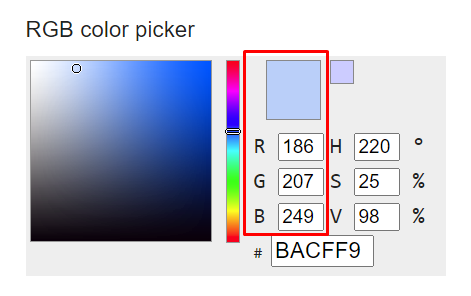

Cluster 1 color: (236, 192, 8)    Percentage: 28.83%
Cluster 2 color: (21, 42, 4)    Percentage: 39.29%
Cluster 3 color: (99, 102, 13)    Percentage: 23.05%
Cluster 4 color: (186, 207, 249)    Percentage: 8.82%


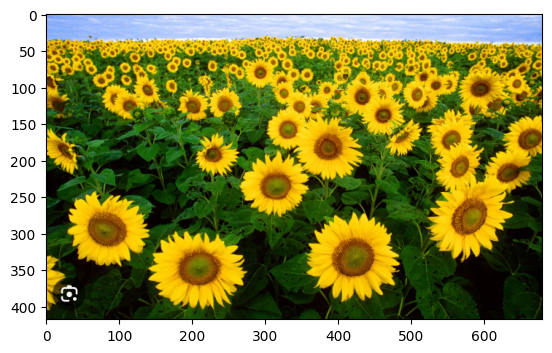

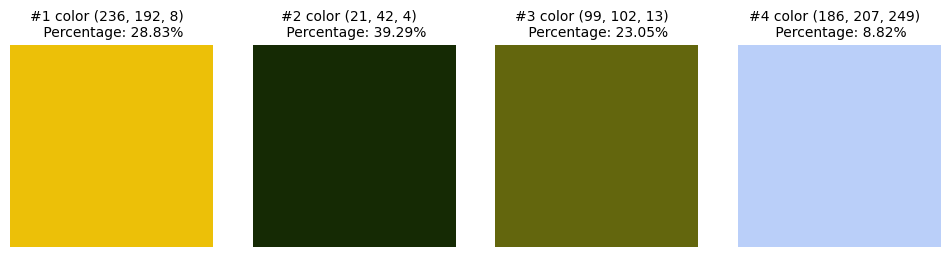

Dominant Color: (21, 42, 4)
Percentage: 39.29%


In [ ]:
SIZE = 4
# Path to the input image
image_path = "https://raw.githubusercontent.com/mehalyna/cooltest/master/cooltest/sunflowers.png"
# Call the function and get the results
dominant_color, percentage = detect_dominant_color(image_path)
# Print the results
print(f"Dominant Color: {dominant_color}")
print(f"Percentage: {percentage:.2f}%")

Cluster 1 color: (30, 54, 62)    Percentage: 14.54%
Cluster 2 color: (196, 116, 64)    Percentage: 8.05%
Cluster 3 color: (40, 133, 146)    Percentage: 6.27%
Cluster 4 color: (10, 10, 13)    Percentage: 55.51%
Cluster 5 color: (206, 182, 155)    Percentage: 5.22%
Cluster 6 color: (109, 51, 31)    Percentage: 10.40%


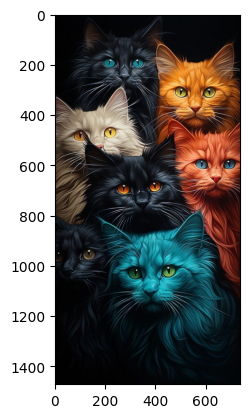

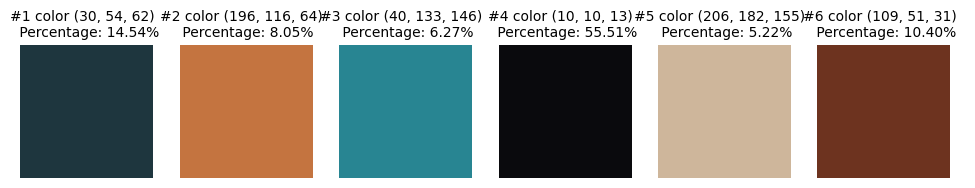

Dominant Color: (10, 10, 13)
Percentage: 55.51%


In [ ]:
SIZE = 5
# Path to the input image
# image_path = "https://i.pinimg.com/736x/05/10/e8/0510e82be594e64f7b5a0bc14ee532f0.jpg"
# image_path = "https://i.pinimg.com/736x/bc/55/b6/bc55b6fd6d35c504b95ea30bb32f5bdf.jpg"
image_path = "https://i.pinimg.com/736x/af/14/3e/af143e4a763fd6e25ba40b89fcd75680.jpg"
# image_path = "https://i.pinimg.com/736x/ef/9b/e5/ef9be57af69c76875599f1fc01e18702.jpg"
# Call the function and get the results
dominant_color, percentage = detect_dominant_color(image_path)
# Print the results
print(f"Dominant Color: {dominant_color}")
print(f"Percentage: {percentage:.2f}%")

<ipython-input-72-c847c6b3b374>:31: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(pixels)


Cluster 1 color: (254, 1, 6)    Percentage: 100.00%
Cluster 2 color: (254, 1, 6)    Percentage: 0.00%
Cluster 3 color: (254, 1, 6)    Percentage: 0.00%


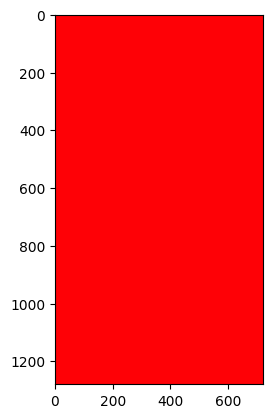

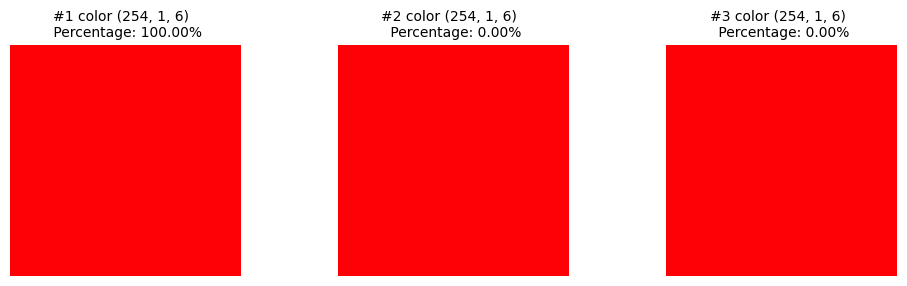

Dominant Color: (254, 1, 6)
Percentage: 100.00%


In [ ]:
SIZE = 3
# Path to the input image
# image_path = "https://i.pinimg.com/736x/05/10/e8/0510e82be594e64f7b5a0bc14ee532f0.jpg"
# image_path = "https://i.pinimg.com/736x/bc/55/b6/bc55b6fd6d35c504b95ea30bb32f5bdf.jpg"
# image_path = "https://i.pinimg.com/736x/af/14/3e/af143e4a763fd6e25ba40b89fcd75680.jpg"
image_path = "https://i.pinimg.com/736x/ef/9b/e5/ef9be57af69c76875599f1fc01e18702.jpg"
# Call the function and get the results
dominant_color, percentage = detect_dominant_color(image_path)
# Print the results
print(f"Dominant Color: {dominant_color}")
print(f"Percentage: {percentage:.2f}%")